# Linear Autoencoder for PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Using pandas to read in the csv file called anonymized_data.csv . It contains 500 rows and 30 columns of anonymized data along with 1 last column with a classification label, where the columns have been renamed to 4 letter codes.**

In [2]:
df = pd.read_csv('anonymized_data.csv')

In [3]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

## Scaling the Data

** Using scikit learn to scale the data with a MinMaxScaler.**

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
scaled_df = scaler.fit_transform(df.drop('Label', axis=1))

# The Linear Autoencoder

** Importing tensorflow and importing fully_connected layers from tensorflow.contrib.layers. **

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [13]:
num_inputs = 30
num_hidden = 2
num_outputs = num_inputs 

learning_rate = 0.01

### Placeholder

** Creating a placeholder fot the data called X.**

In [14]:
X = tf.placeholder(tf.float32, shape=[None,num_inputs])

### Layers

** Creating the hidden layer and the output layers using the fully_connected function. To perform PCA there is no activation function.**

In [15]:
hidden_layer = fully_connected(X, num_outputs=2, activation_fn=None)
output_layer = fully_connected(hidden_layer, num_outputs=30, activation_fn=None)

### Loss Function

** Creating a Mean Squared Error loss function. **

In [16]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

** Creating an AdamOptimizer designed to minimize the previous loss function. **

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [18]:
train = optimizer.minimize(loss)

### Init

** Creating an instance of a global variable intializer. **

In [25]:
init = tf.global_variables_initializer()

## Running the Session

** Now creating a Tensorflow session that runs the optimizer for at least 1000 steps. **

In [21]:
num_steps = 1000

** Now creating a session that runs the scaled data through the hidden layer. **

In [37]:
with tf.Session() as sess: 
    
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X:scaled_df})

    output_2d = hidden_layer.eval(feed_dict={X:scaled_df})


** Confirming that the output is now 2 dimensional along the previous axis of 30 features. **

In [27]:
output_2d.shape

(500, 2)

** Now plotting out the reduced dimensional representation of the data. We still have clear separation of classes even with the reduction in dimensions. **

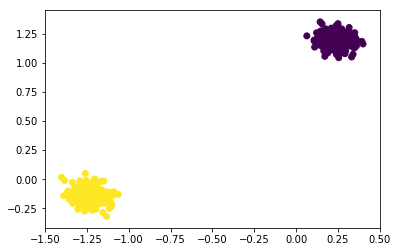

In [38]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=df['Label'])